# Plot STATS

In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = "../../res/SAT"  

def load_results_flat(base_dir=BASE_DIR):
    all_data = {}  # {n: {model: metrics}}
    for fname in sorted(os.listdir(base_dir)):
        if fname.endswith(".json"):
            n_part = os.path.splitext(fname)[0]
            try:
                n = int(n_part)
            except ValueError:
                continue
            json_path = os.path.join(base_dir, fname)
            with open(json_path, "r") as f:
                data = json.load(f)
                
                filtered_data = {
                    model_name: metrics
                    for model_name, metrics in data.items()
                    if not model_name.startswith("decisional")
                }
                
                if filtered_data:
                    all_data[n] = filtered_data
    return all_data

all_data = load_results_flat()
print(all_data)

{10: {'optimization_np_np_sb': {'time': 1, 'optimal': True, 'obj': 1, 'sol': [[[1, 10], [9, 4], [7, 8], [3, 5], [10, 5], [2, 1], [8, 6], [9, 7], [6, 3]], [[9, 2], [7, 6], [3, 10], [7, 1], [4, 6], [4, 8], [9, 5], [5, 2], [1, 8]], [[8, 3], [2, 10], [6, 9], [10, 4], [1, 9], [5, 7], [2, 3], [6, 1], [5, 4]], [[7, 4], [5, 8], [5, 1], [6, 2], [2, 8], [3, 9], [10, 7], [4, 3], [10, 9]], [[6, 5], [1, 3], [4, 2], [8, 9], [3, 7], [10, 6], [4, 1], [8, 10], [7, 2]]]}, 'optimization_heule_seq_sb': {'time': 0, 'optimal': True, 'obj': 1, 'sol': [[[1, 10], [4, 9], [8, 7], [5, 3], [6, 4], [6, 10], [2, 3], [5, 2], [8, 1]], [[7, 4], [3, 1], [9, 6], [9, 8], [10, 5], [1, 2], [6, 8], [4, 3], [2, 7]], [[3, 8], [7, 6], [4, 2], [4, 10], [9, 1], [7, 5], [5, 9], [10, 8], [3, 6]], [[6, 5], [10, 2], [5, 1], [2, 6], [7, 3], [4, 8], [1, 4], [9, 7], [10, 9]], [[2, 9], [8, 5], [3, 10], [1, 7], [8, 2], [3, 9], [7, 10], [6, 1], [5, 4]]]}, 'optimization_heule_totalizer_sb': {'time': 0, 'optimal': True, 'obj': 1, 'sol': [[[

In [8]:
import pandas as pd

def build_runtime_df(all_data):
    # costruiamo un dizionario con chiavi = n, valori = {modello: runtime}
    table = {}
    for n, models in sorted(all_data.items()):  # 🔹 sorted per n crescente
        row = {}
        for model, metrics in models.items():
            row[model] = metrics.get("time")
        table[n] = row
    
    # creiamo DataFrame: righe = n, colonne = modelli
    df = pd.DataFrame.from_dict(table, orient="index")
    df.index.name = "n"
    return df

df = build_runtime_df(all_data)
from IPython.display import display

display(df)


,optimization_np_np_sb,optimization_heule_seq_sb,optimization_heule_totalizer_sb,optimization_np_np_no_sb,optimization_heule_seq_no_sb,optimization_heule_totalizer_no_sb
n,,,,,,
2,0,0,0,0,0,0
4,0,0,0,0,0,0
6,0,0,0,0,0,0
8,0,0,0,0,0,0
10,1,0,0,1,0,0
12,2,0,1,3,1,1
14,7,3,2,7,3,5
16,46,37,36,35,25,34
18,207,143,150,292,160,98


In [9]:
def plot_metric(all_data, metric, ylabel, title, log_y=False):
    """
    Plots a metric for various models and team counts.

    The function distinguishes between data points where a solution
    was found (obj is not None) and those where it wasn't (obj is None).
    - A star (*) marker indicates a sub-optimal or optimal solution was found.
    - A dot (.) marker indicates no solution was found.

    Args:
        all_data (dict): A nested dictionary with the structure {n: {model: metrics}}.
        metric (str): The specific metric to plot (e.g., 'runtime', 'obj').
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.
        log_y (bool): If True, the y-axis will be in a logarithmic scale.
    """
    plt.figure(figsize=(8, 5))
    models = sorted({m for data in all_data.values() for m in data.keys()})


    num_models = len(models)
    offset_step = 0.15 
    base_offset = - (num_models - 1) * offset_step / 2

    for i, model in enumerate(models):
        model_offset = base_offset + i * offset_step
        
        ns_with_obj = []
        values_with_obj = []
        ns_without_obj = []
        values_without_obj = []
        
        ns_all = []
        values_all = []

        for n in sorted(all_data.keys()):
            data = all_data[n].get(model)
            if data and data.get(metric) is not None:
                val = data.get(metric)
                ns_all.append(n)
                values_all.append(val)
                

                if data.get('obj') is not None:
                    ns_with_obj.append(n)
                    values_with_obj.append(val)
                else:
                    ns_without_obj.append(n)
                    values_without_obj.append(val)
        
        if ns_all:
            line, = plt.plot(ns_all, values_all, linestyle='-', label=model)
            color = line.get_color()
            
            if ns_with_obj:
                ns_with_obj_offset = [n + model_offset for n in ns_with_obj]
                plt.plot(ns_with_obj_offset, values_with_obj, marker='*', linestyle='', color=color, markersize=10)
            if ns_without_obj:
                ns_without_obj_offset = [n + model_offset for n in ns_without_obj]
                plt.plot(ns_without_obj_offset, values_without_obj, marker='.', linestyle='', color=color, markersize=10)
                
    plt.xlabel("Number of Teams (n)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if log_y:
        plt.yscale("log")
    plt.xticks(sorted(all_data.keys()))  
    plt.show()


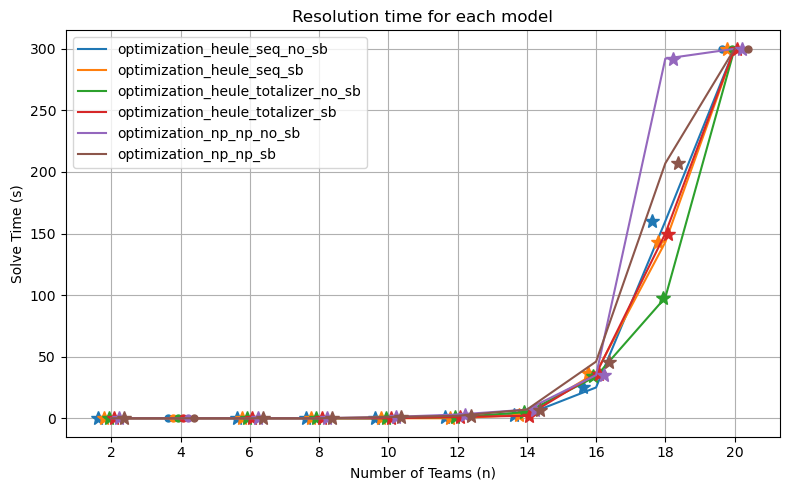

In [10]:
plot_metric(
    all_data,
    metric="time",
    ylabel="Solve Time (s)",
    title="Resolution time for each model"
)

In [26]:
def plot_metric(all_data, metric, ylabel, title, log_y=False):
    plt.figure(figsize=(8, 5))
    models = sorted({m for data in all_data.values() for m in data.keys()})

    for model in models:
        ns = []
        values = []
        for n in sorted(all_data.keys()): # all_data = {n: {model: metrics}}
            data = all_data[n].get(model)
            val = data.get(metric) if data else None
            if val is not None:
                ns.append(n)
                values.append(val)
        if ns:
            plt.plot(ns, values, marker='o', label=model)
    plt.xlabel("Number of Teams (n)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if log_y:
        plt.yscale("log")
    plt.xticks(sorted(all_data.keys()))  
    plt.show()

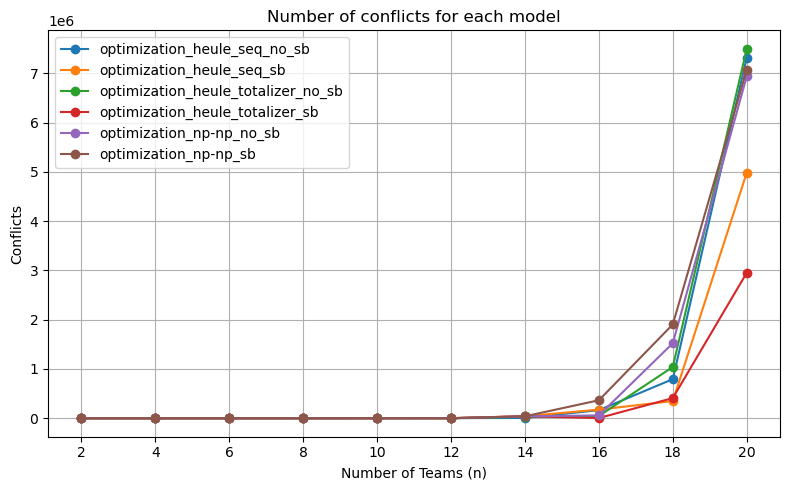

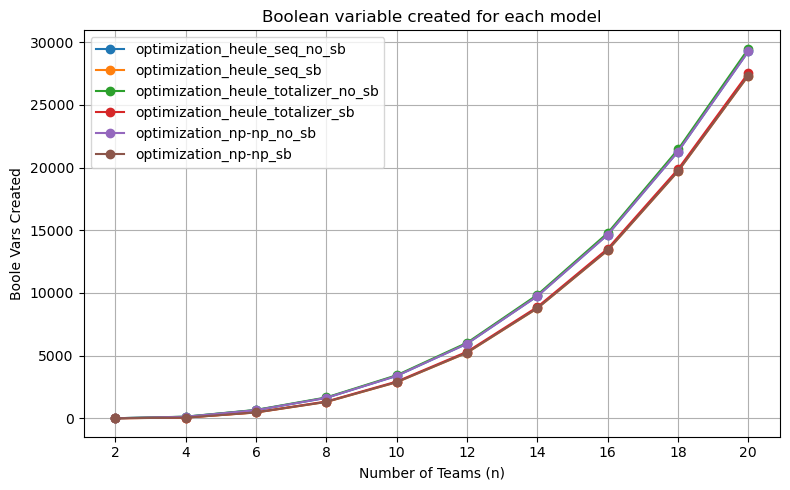

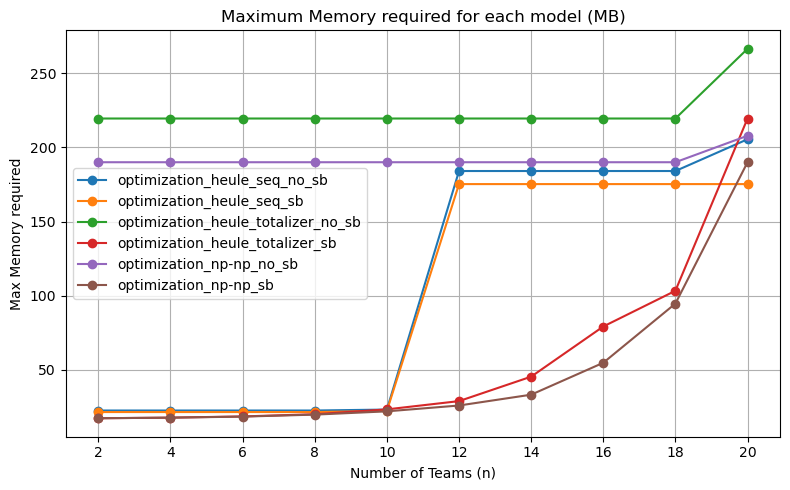

In [27]:

plot_metric(
    all_data,
    metric="conflicts",
    ylabel="Conflicts",
    title="Number of conflicts for each model"
)

plot_metric(
    all_data,
    metric="mk_bool_var",
    ylabel="Boole Vars Created",
    title="Boolean variable created for each model"
)

plot_metric(
    all_data,
    metric="max_memory",
    ylabel="Max Memory required",
    title="Maximum Memory required for each model (MB)"
)

-------------------